In [ ]:
# ========================== Import Required Libraries ==========================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import RandomizedSearchCV
from tabulate import tabulate
import joblib

# ========================== Load and Prepare the Data ==========================
df = pd.read_csv('cleaned_final_data.csv')
df.head()

,Gender,Age,Marital status,do you walk,walking minutes range,moderate sports,moderate minutes range,time spend sitting,sleep_range,Smoking,...,FH DIABETES YN,Gestational Diabetes,Status of Diabetes after Delivery,BMI,Waist Circm [cm],FBG,HBA1C,TC,fast_food_intake,Diabetes_Status
0,Male,29,Currently married,Yes,Low,No,Very Low,High,Recommended,No,...,No,No,No,31.8,100.0,4.8,4.50,5.0,Occasional,0
1,Male,44,Currently married,No,Very Low,Yes,Very Low,High,Recommended,Yes,...,Yes,No,No,31.8,100.0,8.0,8.02,4.0,Rare,2
2,Male,34,Currently married,Yes,Very High,No,Very Low,Very Low,Recommended,No,...,Yes,No,No,24.1,90.0,5.6,4.70,5.9,Occasional,2
3,Female,40,Currently married,Yes,Very High,No,Very Low,Low,Long,No,...,No,Yes,Yes,20.1,75.0,5.2,5.50,5.5,Rare,0
4,Male,56,Currently married,Yes,Low,No,Very Low,Very High,Short,No,...,No,No,No,33.4,110.0,5.0,5.50,5.9,Never,0


In [ ]:
# ========================== Encoding Categorical Features ==========================
gender_map = {'Male': 0, 'Female': 1}
marital_status_map = {'Never married': 0, 'Currently married': 1, 'Divorced': 2, 'Widowed': 3}
binary_map = {'Yes': 1, 'No': 0}
walking_map = {'Very Low': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
moderate_map = {'Very Low': 0, 'Low': 1, 'Moderate': 2, 'High': 3}
sitting_map = {'Very Low': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
sleep_map = {'Very Short': 0, 'Short': 1, 'Recommended': 2, 'Long': 3}
fastFood_map = {'Occasional': 0, 'Rare': 1, 'Never': 2, 'Frequent': 3}

# Apply all mappings
df['Gender'] = df['Gender'].map(gender_map)
df['Marital status'] = df['Marital status'].map(marital_status_map)
df['do you walk'] = df['do you walk'].map(binary_map)
df['walking minutes range'] = df['walking minutes range'].map(walking_map)
df['moderate sports'] = df['moderate sports'].map(binary_map)
df['moderate minutes range'] = df['moderate minutes range'].map(moderate_map)
df['time spend sitting'] = df['time spend sitting'].map(sitting_map)
df['sleep_range'] = df['sleep_range'].map(sleep_map)
df['Smoking'] = df['Smoking'].map(binary_map)
df['Alcohol'] = df['Alcohol'].map(binary_map)
df['Diagnosed -High chol'] = df['Diagnosed -High chol'].map(binary_map)
df['Diagnosed - Cancer'] = df['Diagnosed - Cancer'].map(binary_map)
df['Diagnosis -cardiovasular Disease'] = df['Diagnosis -cardiovasular Disease'].map(binary_map)
df['Diagnosis of Kidney disease'] = df['Diagnosis of Kidney disease'].map(binary_map)
df['Diagnosis of Liver disease'] = df['Diagnosis of Liver disease'].map(binary_map)
df['FH DIABETES YN'] = df['FH DIABETES YN'].map(binary_map)
df['Gestational Diabetes'] = df['Gestational Diabetes'].map(binary_map)
df['Status of Diabetes after Delivery'] = df['Status of Diabetes after Delivery'].map(binary_map)
df['fast_food_intake'] = df['fast_food_intake'].map(fastFood_map)

In [ ]:
df.head()

,Gender,Age,Marital status,do you walk,walking minutes range,moderate sports,moderate minutes range,time spend sitting,sleep_range,Smoking,...,FH DIABETES YN,Gestational Diabetes,Status of Diabetes after Delivery,BMI,Waist Circm [cm],FBG,HBA1C,TC,fast_food_intake,Diabetes_Status
0,0,29,1,1,1,0,0,3,2,0,...,0,0,0,31.8,100.0,4.8,4.50,5.0,0,0
1,0,44,1,0,0,1,0,3,2,1,...,1,0,0,31.8,100.0,8.0,8.02,4.0,1,2
2,0,34,1,1,4,0,0,0,2,0,...,1,0,0,24.1,90.0,5.6,4.70,5.9,0,2
3,1,40,1,1,4,0,0,1,3,0,...,0,1,1,20.1,75.0,5.2,5.50,5.5,1,0
4,0,56,1,1,1,0,0,4,1,0,...,0,0,0,33.4,110.0,5.0,5.50,5.9,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2702 non-null   int64  
 1   Age                                2702 non-null   int64  
 2   Marital status                     2702 non-null   int64  
 3   do you walk                        2702 non-null   int64  
 4   walking minutes range              2702 non-null   int64  
 5   moderate sports                    2702 non-null   int64  
 6   moderate minutes range             2702 non-null   int64  
 7   time spend sitting                 2702 non-null   int64  
 8   sleep_range                        2702 non-null   int64  
 9   Smoking                            2702 non-null   int64  
 10  Alcohol                            2702 non-null   int64  
 11  Diagnosed -High chol               2702 non-null   int64

In [ ]:
# ========================== Define Features and Target ==========================
X = df.drop('Diabetes_Status', axis=1)
y = df['Diabetes_Status']

# ========================== Split the Data ==========================
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print(f"Train: {len(X_train)} | Validation: {len(X_val)} | Test: {len(X_test)}")

Train: 1620 | Validation: 541 | Test: 541


In [ ]:
print(y.value_counts())

Diabetes_Status
1    1025
2     854
0     823
Name: count, dtype: int64


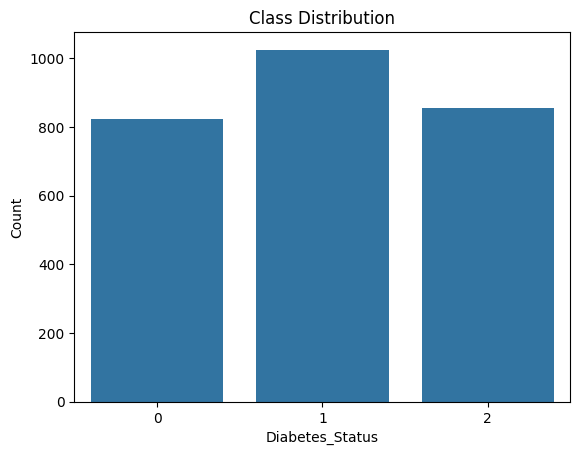

In [ ]:
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("Diabetes_Status")
plt.ylabel("Count")
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score
from scipy.stats import randint

recall_scorer = make_scorer(recall_score, pos_label=1)

# Define parameter distribution
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

# Base model
rf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring=recall_scorer,
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the best model
random_search.fit(X_train, y_train)
best_rf_model = random_search.best_estimator_

best_rf_model

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomForestClassifier(class_weight='balanced', max_depth=15,
                       max_features='log2', min_samples_split=10,
                       n_estimators=206, random_state=42)

In [ ]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 206}


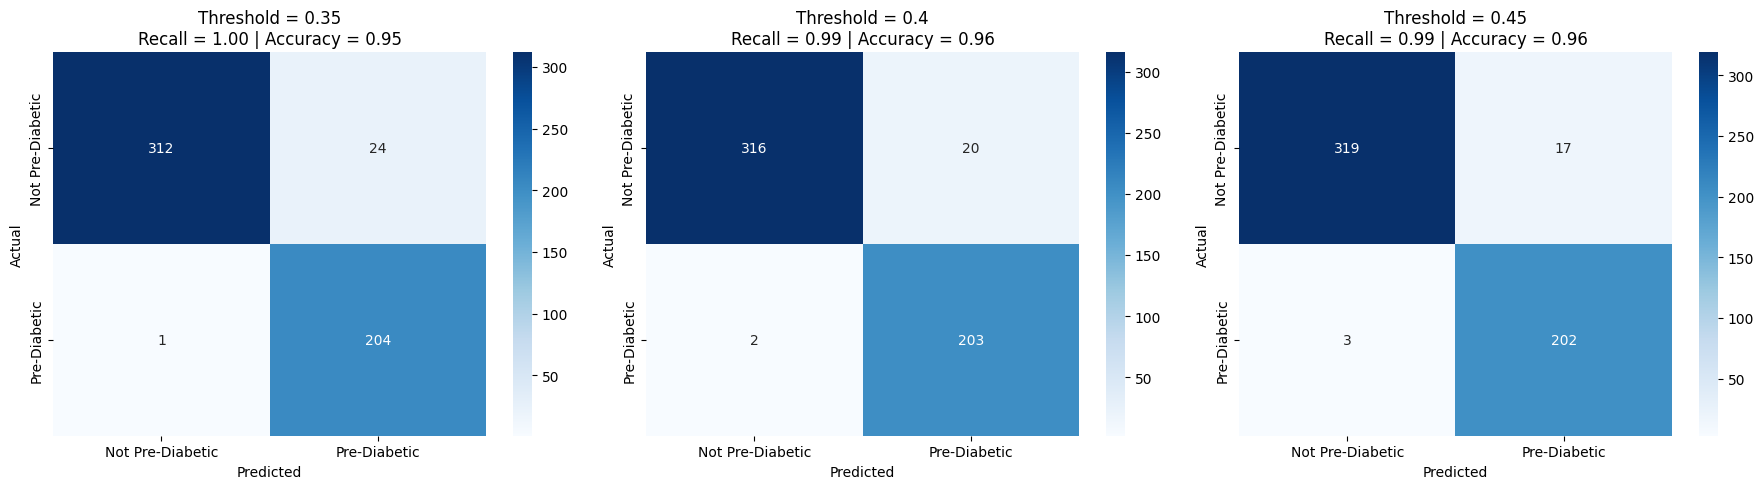

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

val_probs = best_rf_model.predict_proba(X_val)[:, 1]  # احتمالية أن تكون الفئة = 1 فقط
y_val_binary = y_val.apply(lambda x: 1 if x == 1 else 0)

thresholds_to_compare = [0.35, 0.4, 0.45]
conf_matrices = []
titles = []

for thresh in thresholds_to_compare:
    preds = (val_probs >= thresh).astype(int)
    cm = confusion_matrix(y_val_binary, preds)
    conf_matrices.append(cm)

    TP = cm[1][1]
    FN = cm[1][0]
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    acc = accuracy_score(y_val_binary, preds)

    titles.append(f"Threshold = {thresh}\nRecall = {recall:.2f} | Accuracy = {acc:.2f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, cm, title in zip(axes, conf_matrices, titles):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Pre-Diabetic', 'Pre-Diabetic'],
                yticklabels=['Not Pre-Diabetic', 'Pre-Diabetic'],
                ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)

plt.tight_layout()
plt.show()


# Best result in Test Data

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

y_test_binary = y_test.apply(lambda x: 1 if x == 1 else 0)

test_probs = best_rf_model.predict_proba(X_test)[:, 1]

threshold = 0.35
test_preds = (test_probs >= threshold).astype(int)

test_acc = accuracy_score(y_test_binary, test_preds)
test_rec = recall_score(y_test_binary, test_preds)
test_cm = confusion_matrix(y_test_binary, test_preds)

print("Accuracy:", test_acc)
print("Recall:", test_rec)
print("Confusion Matrix:\n", test_cm)


Accuracy: 0.9593345656192237
Recall: 1.0
Confusion Matrix:
 [[314  22]
 [  0 205]]


## Test casses

In [ ]:
height = 180
weight = 55

BMI = weight / (height/100)**2

new_data = {
    'Gender': 1,
    'Age': 45,
    'Marital status': 1,
    'do you walk': 0,
    'walking minutes range': 0,
    'moderate sports': 0,
    'moderate minutes range': 0,
    'time spend sitting': 4,
    'sleep_range': 1,
    'Smoking': 1,
    'Alcohol': 1,
    'Diagnosed -High chol': 1,
    'Diagnosed - Cancer': 0,
    'Diagnosis -cardiovasular Disease': 0,
    'Diagnosis of Kidney disease': 0,
    'Diagnosis of Liver disease': 0,
    'FH DIABETES YN': 1,
    'Gestational Diabetes': 1,
    'Status of Diabetes after Delivery': 1,
    'BMI': BMI,
    'Waist Circm [cm]': 88,
    'FBG': 6.0,
    'HBA1C': 6.2,
    'TC': 7.0,
    'fast_food_intake': 0
}

In [ ]:

new_df = pd.DataFrame([new_data])
probs = best_rf_model.predict_proba(new_df)

# عرض الاحتمالات
print(f"Probabilities: Normal = {probs[0][0]:.2f}, Pre-Diabetic = {probs[0][1]:.2f}, Diabetic = {probs[0][2]:.2f}")

# توقع الفئة النهائية
pred_class = best_rf_model.predict(new_df)[0]

# طباعة التوقع
if pred_class == 0:
    print("Predicted class: Normal (0)")
elif pred_class == 1:
    print("Predicted class: Pre-Diabetic (1)")
else:
    print("Predicted class: Diabetic (2)")


Probabilities: Normal = 0.09, Pre-Diabetic = 0.54, Diabetic = 0.37
Predicted class: Pre-Diabetic (1)


# save model

In [ ]:
import joblib
# Save the model
joblib.dump(best_rf_model, 'prediction_model.joblib')

['prediction_model.joblib']

In [ ]:
print(list(X.columns))

['Gender', 'Age', 'Marital status', 'do you walk', 'walking minutes range', 'moderate sports', 'moderate minutes range', 'time spend sitting', 'sleep_range', 'Smoking', 'Alcohol', 'Diagnosed -High chol', 'Diagnosed - Cancer', 'Diagnosis -cardiovasular Disease', 'Diagnosis of Kidney disease', 'Diagnosis of Liver disease', 'FH DIABETES YN', 'Gestational Diabetes', 'Status of Diabetes after Delivery', 'BMI', 'Waist Circm [cm]', 'FBG', 'HBA1C', 'TC', 'fast_food_intake']
